<a href="https://colab.research.google.com/github/Sankarsh-Sunku/Implementation-Of-DL-in-Pytorch/blob/main/ANN/Implemetation_Of_Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

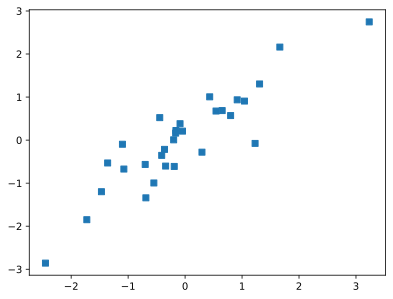

In [2]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [7]:
ANNRegression = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)
)

ANNRegression

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [19]:
lr = 0.1
loss = nn.MSELoss()
optimizer = torch.optim.SGD(ANNRegression.parameters(),lr=lr)

In [21]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for e in range(numepochs):

  # forward pass
  yHat = ANNRegression(x)

  # compute loss
  l = loss(yHat,y)
  losses[e] = l

  # backprop
  optimizer.zero_grad()
  l.backward()
  optimizer.step()

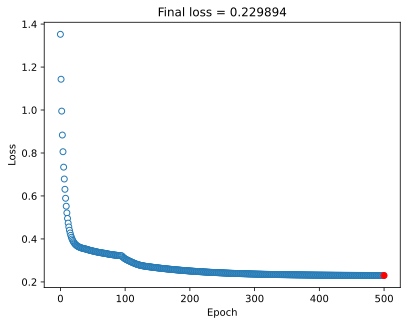

In [23]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNRegression(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [24]:
testloss.item()

0.22989405691623688

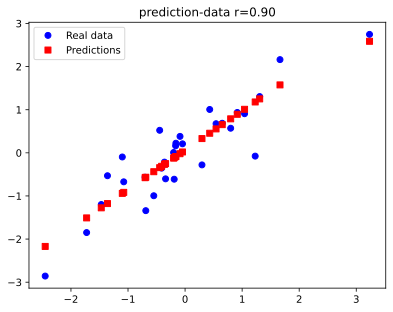

In [25]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()